# Topography

Topography
SRTMGL1_003

The Land Processes Distributed Active Archive Center (LP DAAC) is responsible for the archive and distribution of the NASA Making Earth System Data Records for Use in Research Environments (MEaSUREs) version SRTM, which includes the global 1 arc second (~30 meter) product.

NASA Shuttle Radar Topography Mission (SRTM) datasets result from a collaborative effort by the National Aeronautics and Space Administration (NASA) and the National Geospatial-Intelligence Agency (NGA - previously known as the National Imagery and Mapping Agency, or NIMA), as well as the participation of the German and Italian space agencies. The purpose of SRTM was to generate a near-global digital elevation model (DEM) of the Earth using radar interferometry. SRTM was a primary component of the payload on the Space Shuttle Endeavour during its STS-99 mission. Endeavour launched February 11, 2000 and ﬂew for 11 days.

In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.9 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11124 sha256=f28b386bfe68ed04aad61eba1a4e891bd76557431abef8f96abb6

In [ ]:
import geemap
geemap.update_package()

Unzipping geemap-master.zip ...
Data downloaded to: /root/Downloads/geemap-master

Please comment out 'geemap.update_package()' and restart the kernel to take effect:
Jupyter menu -> Kernel -> Restart & Clear Output


In [ ]:
import os
import ee
import numpy as np
import pandas as pd
import time
import glob
import re

In [ ]:

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=d5NvKHJ0TmnovugsbX4FAIbPcqUNJWpkl3c7KEXEN4c&tc=HTZZV-lMDx_mr8gCCk2tjE6xgAFXLM3yzXTB1HZwzg4&cc=rjHB-tHyiCMA2isRfbDhtHdLEaXKJSJ4MjTG04H5GG4

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VP5EkwZGzKDRDr08_KQks1LXI11HLPnPXWGZhXu5cX6CmD-ZPusl0w

Successfully saved authorization token.


In [ ]:
#Test for 1 location (SRTM)
DEM = ee.Image("USGS/SRTMGL1_003")
u_lon = -79.88475594307026
u_lat = 33.012499997035384
u_poi = ee.Geometry.Point(u_lon, u_lat)
fc = ee.FeatureCollection(u_poi)
reducer = ee.Reducer.first()
data = DEM.reduceRegions(fc, reducer.setOutputs(['elevation']), 30)
data = data.first().get('elevation').getInfo()
print(data)

8


##Import Library

##Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
eachfire='/content/gdrive/MyDrive/Thesis/data_output.csv'
eachfire = pd.read_csv(eachfire)
eachfire.drop(['Unnamed: 0','Unnamed: 0.1'], inplace=True, axis=1)


In [ ]:
eachfire

lat         lon      x     y   H  V    i    j       dtime  \
0        19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01   
1        19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01   
2        19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01   
3        19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01   
4        19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01   
...            ...         ...    ...   ...  .. ..  ...  ...         ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363  2019-12-31   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361  2019-12-31   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362  2019-12-31   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363  2019-12-31   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361  2019-12-31   

         conf  maxFRP satellite                  neigh     t  \
0           9    1476       MYD  cloud (land or water)  4383   
1           9    1476       MYD  cloud (land or water)  4383   
2           9     955       MYD  cloud (land or water)  4383   
3           9     955       MYD  cloud (land or water)  4383   
4           9     299       MYD  cloud (land or water)  4383   
...       ...     ...       ...                    ...   ...   
1432550     8     136       MYD    non-fire land pixel  6573   
1432551     7     107       MYD   non-fire water pixel  6573   
1432552     8     136       MYD   non-fire water pixel  6573   
1432553     8     136       MYD    non-fire land pixel  6573   
1432554     7     107       MYD   non-fire water pixel  6573   

                          country      continent  neigh_int       gl        cp  
0        United States of America  North America          3     2919     32636  
1        United States of America  North America          3     2956     32636  
2        United States of America  North America          3     2996     32636  
3        United States of America  North America          3     3034     32636  
4        United States of America  North America          3     2884     32636  
...                           ...            ...        ...      ...       ...  
1432550  United States of America  North America          5  4027916  10248728  
1432551  United States of America  North America          4  4024780  10248728  
1432552  United States of America  North America          4  4026335  10248728  
1432553  United States of America  North America          5  4027917  10248728  
1432554  United States of America  North America          4  4024781  10248728  

[1432555 rows x 19 columns]

## Interest Part

In [ ]:
elevation_data = eachfire[['lon', 'lat','dtime','cp']].copy()

In [ ]:
new_elevation_data = elevation_data.drop_duplicates(
    subset=['cp','dtime'],
    keep='last').reset_index(drop=True).sort_values(['cp','dtime'])

elevation_data

lon        lat       dtime        cp
217156 -154.932895  19.454167  2018-05-30        11
217182 -154.881637  19.437500  2018-05-31        11
217250 -154.871030  19.454167  2018-06-01        11
217321 -154.889588  19.445833  2018-06-02        11
217392 -154.891362  19.429167  2018-06-03        11
...            ...        ...         ...       ...
76317   -96.588897  32.287500  2015-08-23  36526726
152617  -94.693694  42.270833  2017-03-09  36526808
175666  -97.806507  48.470833  2017-08-30  36527114
76318   -94.459538  31.695833  2015-08-23  36527218
76322   -95.860392  30.045833  2015-08-23  36527322

[279960 rows x 4 columns]

In [ ]:
##spilt data so easy to extract and avoid error while chatch
list_df = np.array_split(elevation_data, 120)

In [ ]:
list_df

[               lon        lat       dtime    cp
 217156 -154.932895  19.454167  2018-05-30    11
 217182 -154.881637  19.437500  2018-05-31    11
 217250 -154.871030  19.454167  2018-06-01    11
 217321 -154.889588  19.445833  2018-06-02    11
 217392 -154.891362  19.429167  2018-06-03    11
 ...            ...        ...         ...   ...
 168125 -112.725058  37.654167  2017-06-26  3315
 168251 -112.735583  37.654167  2017-06-27  3315
 228287 -110.591077  43.045833  2018-09-15  3347
 228414 -110.500442  43.020833  2018-09-16  3347
 228506 -110.523239  43.020833  2018-09-17  3347
 
 [2333 rows x 4 columns],                lon        lat       dtime     cp
 228690 -110.375061  43.020833  2018-09-18   3347
 228919 -110.496844  43.012500  2018-09-19   3347
 229146 -110.429109  42.987500  2018-09-20   3347
 229378 -110.406325  42.987500  2018-09-21   3347
 229490 -110.444083  42.995833  2018-09-22   3347
 ...            ...        ...         ...    ...
 205978  -81.555466  25.995833  201

##Extracting data from SRTM Image collection USGS/SRTMGL1_003

In [ ]:
#Test for 1 location (SRTM)
DEM = ee.Image('USGS/GMTED2010')
u_lon = -144.043286
u_lat = 66.279167
u_poi = ee.Geometry.Point(u_lon, u_lat)
fc = ee.FeatureCollection(u_poi)
reducer = ee.Reducer.first()
data = DEM.reduceRegions(fc, reducer.setOutputs(['elevation']), 30)
data = data.first().get('elevation').getInfo()
print(data)

196


In [ ]:
#Test for 1 location from satelite (Earth Engine)
lst = ee.ImageCollection("NRCan/CDEM")

i_date = '2017-05-01'
#Take u_component_of_wind_10m
lstu = lst.select('elevation')
scale = 1000  # scale in meters
# Define the location of interest as a point.
u_lon = 4.8148
u_lat = 45.7758
u_poi = ee.Geometry.Point(u_lon, u_lat)
# Taking data
lst_urban_u = lstu.mean().sample(u_poi,scale).first().getInfo()
#lst_urban_v = lst.mean().sample(u_poi,scale).first().get('v_component_of_wind_10m').getInfo()
print(lst_urban_u)

None


In [ ]:
#Connect to satelite image SRTM
DEM = ee.Image("USGS/SRTMGL1_003")

#Function grab info from satelite image collection
def elevation_extract (u_lon,u_lat):
    #Geometry Point
    u_poi = ee.Geometry.Point(u_lon, u_lat)
    fc = ee.FeatureCollection(u_poi) # Make a featurecollection from points
    reducer = ee.Reducer.first() # extract points from DEM
    data = DEM.reduceRegions(fc, reducer.setOutputs(['elevation']), 30)
    data = data.first().get('elevation').getInfo() # extract Elevation
    return data

In [ ]:
#Manipulating time to conect with server.
n = 0
while n <= 120:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['elevation'] = df.apply(lambda x: elevation_extract(x['lon'], x['lat']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/elevation_data'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 120:
    break


0already
1already
2already
3already
4already
5already
6already
7already
8already
9already
10already
11already
12already
13already
14already
15already
16already
17already
18already
19already
20already
21already
22already
23already
24already
25already
26already
27already
28already
29already


In [ ]:
# Looking all files
files = os.path.join("/content/gdrive/MyDrive/Thesis/", "elevation_data*.csv")

In [ ]:
# Sorted, list all files and glob the files

files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/elevation_data0.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data1.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data2.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data3.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data4.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data5.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data6.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data7.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data8.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data9.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data10.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data11.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data12.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data13.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data14.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data15.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data16.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data17.csv',
 '

In [ ]:
# Combine into one Dataframe
ele_complete = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
ele_complete.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
ele_complete

lon        lat        date        cp  elevation
0      -154.932895  19.454167  2018-05-30        11      309.0
1      -154.881637  19.437500  2018-05-31        11       52.0
2      -154.871030  19.454167  2018-06-01        11       66.0
3      -154.889588  19.445833  2018-06-02        11       94.0
4      -154.891362  19.429167  2018-06-03        11       56.0
...            ...        ...         ...       ...        ...
279955  -96.588897  32.287500  2015-08-23  36526726      148.0
279956  -94.693694  42.270833  2017-03-09  36526808      368.0
279957  -97.806507  48.470833  2017-08-30  36527114      345.0
279958  -94.459538  31.695833  2015-08-23  36527218       88.0
279959  -95.860392  30.045833  2015-08-23  36527322       72.0

[279960 rows x 5 columns]

##save to database

In [ ]:
ele_complete.to_csv('/content/gdrive/MyDrive/Thesis/elevation_complete.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
## loading Wind data
wind_data='/content/gdrive/MyDrive/Thesis/Wind_complete.csv'
wind_data = pd.read_csv(wind_data)
wind_data.drop(['Unnamed: 0'], inplace=True, axis=1)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
wind_data

lon        lat        date        cp               wind_u  \
0      -154.932895  19.454167  2018-05-30        11  -3.0528573989868164   
1      -154.881637  19.437500  2018-05-31        11   -3.352006673812866   
2      -154.871030  19.454167  2018-06-01        11   -2.279644727706909   
3      -154.889588  19.445833  2018-06-02        11   -2.494065523147583   
4      -154.891362  19.429167  2018-06-03        11      -2.771728515625   
...            ...        ...         ...       ...                  ...   
279955  -96.588897  32.287500  2015-08-23  36526726             0.179981   
279956  -94.693694  42.270833  2017-03-09  36526808            -2.529169   
279957  -97.806507  48.470833  2017-08-30  36527114            -1.654684   
279958  -94.459538  31.695833  2015-08-23  36527218             0.765441   
279959  -95.860392  30.045833  2015-08-23  36527322             0.111725   

                      wind_v  wind_u_flt  wind_v_flt  \
0        -2.8446600437164307   -3.052857   -2.844660   
1        -3.0698630809783936   -3.352007   -3.069863   
2        -2.4723854064941406   -2.279645   -2.472385   
3        -1.7994966506958008   -2.494066   -1.799497   
4        -1.6174421310424805   -2.771729   -1.617442   
...                      ...         ...         ...   
279955              3.048125    0.179981    3.048125   
279956             -3.005235   -2.529169   -3.005235   
279957             -3.464599   -1.654684   -3.464599   
279958              2.028422    0.765441    2.028422   
279959              2.027906    0.111725    2.027906   

                   wind_direction  wind_speed  
0        47.02184700068143 degree    4.172772  
1       47.515661076996146 degree    4.545328  
2        42.67737631913129 degree    3.362955  
3       54.189122824377094 degree    3.075476  
4         59.7343020693647 degree    3.209143  
...                           ...         ...  
279955   183.3791969987351 degree    3.053434  
279956   40.08355088918048 degree    3.927866  
279957  25.529026682813267 degree    3.839456  
279958  200.67440348868902 degree    2.168040  
279959  183.15345088172876 degree    2.030981  

[279960 rows x 10 columns]

##combine with wind data

In [ ]:
Wind_complete = wind_data[['cp', 'date','wind_direction','wind_speed']].copy()

In [ ]:
ele_complete.sort_values(['cp','date'])

lon        lat        date        cp  elevation
0      -154.932895  19.454167  2018-05-30        11      309.0
1      -154.881637  19.437500  2018-05-31        11       52.0
2      -154.871030  19.454167  2018-06-01        11       66.0
3      -154.889588  19.445833  2018-06-02        11       94.0
4      -154.891362  19.429167  2018-06-03        11       56.0
...            ...        ...         ...       ...        ...
279955  -96.588897  32.287500  2015-08-23  36526726      148.0
279956  -94.693694  42.270833  2017-03-09  36526808      368.0
279957  -97.806507  48.470833  2017-08-30  36527114      345.0
279958  -94.459538  31.695833  2015-08-23  36527218       88.0
279959  -95.860392  30.045833  2015-08-23  36527322       72.0

[279960 rows x 5 columns]

In [ ]:
Wind_complete.sort_values(['cp','date'])

cp        date             wind_direction  wind_speed
0             11  2018-05-30   47.02184700068143 degree    4.172772
1             11  2018-05-31  47.515661076996146 degree    4.545328
2             11  2018-06-01   42.67737631913129 degree    3.362955
3             11  2018-06-02  54.189122824377094 degree    3.075476
4             11  2018-06-03    59.7343020693647 degree    3.209143
...          ...         ...                        ...         ...
279955  36526726  2015-08-23   183.3791969987351 degree    3.053434
279956  36526808  2017-03-09   40.08355088918048 degree    3.927866
279957  36527114  2017-08-30  25.529026682813267 degree    3.839456
279958  36527218  2015-08-23  200.67440348868902 degree    2.168040
279959  36527322  2015-08-23  183.15345088172876 degree    2.030981

[279960 rows x 4 columns]

In [ ]:
new_df = pd.merge(ele_complete, Wind_complete,  how='left', left_on=['cp','date'], right_on = ['cp','date'])

In [ ]:
new_df

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed  
0        47.02184700068143 degree    4.172772  
1       47.515661076996146 degree    4.545328  
2        42.67737631913129 degree    3.362955  
3       54.189122824377094 degree    3.075476  
4         59.7343020693647 degree    3.209143  
...                           ...         ...  
279955   183.3791969987351 degree    3.053434  
279956   40.08355088918048 degree    3.927866  
279957  25.529026682813267 degree    3.839456  
279958  200.67440348868902 degree    2.168040  
279959  183.15345088172876 degree    2.030981  

[279960 rows x 7 columns]

In [ ]:
new_df.to_csv('/content/gdrive/MyDrive/Thesis/Wind+Elevation.csv')

In [ ]:
full='/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_frp.csv'
full = pd.read_csv(full)
full.drop(['Unnamed: 0'], inplace=True, axis=1)


<ipython-input-49-f225fe4274fd>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv(full)


In [ ]:
new_df='/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_frp.csv'
new_df = pd.read_csv(new_df)
new_df.drop(['Unnamed: 0'], inplace=True, axis=1)


<ipython-input-7-2704d51dcca6>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(new_df)


In [ ]:
new_df = new_df[new_df['elevation'].isna()]

In [ ]:
new_df

lon        lat        date        cp  elevation  \
119    -144.043286  66.279167  2019-06-25        44        NaN   
120    -144.028816  66.287500  2019-06-26        44        NaN   
121    -144.035069  66.295833  2019-06-27        44        NaN   
122    -144.076527  66.295833  2019-06-28        44        NaN   
123    -143.995625  66.270833  2019-06-29        44        NaN   
...            ...        ...         ...       ...        ...   
279681 -153.692814  64.029167  2015-08-07  36470747        NaN   
279685 -154.494103  64.612500  2015-08-07  36471547        NaN   
279686 -157.212079  64.487500  2015-08-07  36471694        NaN   
279800 -142.545731  61.787500  2016-09-03  36487813        NaN   
279839 -146.869839  61.237500  2016-09-03  36497365        NaN   

                   wind_direction  wind_speed landcover       temp  \
119      334.9301957362663 degree    2.334427         8  19.510000   
120      85.92338136439125 degree    1.185893         1  23.970000   
121     240.15785230078265 degree    1.980267         1  19.523584   
122     247.10159983672796 degree    2.620272         8  20.750000   
123     277.56069149503355 degree    1.900149         8  30.870000   
...                           ...         ...       ...        ...   
279681  226.70092515442698 degree    1.297635         8  29.290000   
279685   239.7654716837494 degree    0.989597         8  25.790000   
279686  228.54794791676892 degree    1.790092         8  22.410000   
279800  213.94376596845223 degree    1.274478        15   2.230000   
279839   298.0379637565625 degree    0.368127        16   4.070000   

                precipitation         pressure  maxFRP  
119     0.0009686574339866638         99436.75     409  
120                         0   100044.6484375     466  
121     0.0006237849593162537    99882.7890625     338  
122     0.0003309287130832672      99664.03125      48  
123                         0          99502.5     642  
...                       ...              ...     ...  
279681                    0.0     97667.164062     210  
279685                    0.0     99896.007812      44  
279686               0.000001     98757.085938     251  
279800               0.000005        79575.625      83  
279839                    0.0     88508.148438     105  

[7477 rows x 12 columns]

In [ ]:
new_elevation_data = new_df[['lon', 'lat','date','cp']].copy()

In [ ]:
new_elevation_data = new_elevation_data.drop_duplicates(
    subset=['cp','date'],
    keep='last').reset_index(drop=True).sort_values(['cp','date'])

new_elevation_data

lon        lat        date        cp
0    -144.043286  66.279167  2019-06-25        44
1    -144.028816  66.287500  2019-06-26        44
2    -144.035069  66.295833  2019-06-27        44
3    -144.076527  66.295833  2019-06-28        44
4    -143.995625  66.270833  2019-06-29        44
...          ...        ...         ...       ...
7472 -153.692814  64.029167  2015-08-07  36470747
7473 -154.494103  64.612500  2015-08-07  36471547
7474 -157.212079  64.487500  2015-08-07  36471694
7475 -142.545731  61.787500  2016-09-03  36487813
7476 -146.869839  61.237500  2016-09-03  36497365

[7477 rows x 4 columns]

In [ ]:
##spilt data so easy to extract and avoid error while chatch
new_list_df = np.array_split(new_elevation_data, 30)

In [ ]:
new_list_df

[            lon        lat        date    cp
 0   -144.043286  66.279167  2019-06-25    44
 1   -144.028816  66.287500  2019-06-26    44
 2   -144.035069  66.295833  2019-06-27    44
 3   -144.076527  66.295833  2019-06-28    44
 4   -143.995625  66.270833  2019-06-29    44
 ..          ...        ...         ...   ...
 245 -154.806967  61.062500  2015-06-15  4942
 246 -154.781905  61.029167  2015-06-16  4942
 247 -154.770951  61.037500  2015-06-17  4942
 248 -154.775656  61.020833  2015-06-18  4942
 249 -154.672455  61.020833  2015-06-19  4942
 
 [250 rows x 4 columns],
             lon        lat        date     cp
 250 -154.677221  61.004167  2015-06-20   4942
 251 -154.642839  61.004167  2015-06-21   4942
 252 -154.677221  61.004167  2015-06-22   4942
 253 -154.624265  60.979167  2015-06-23   4942
 254 -154.664814  60.987500  2015-06-24   4942
 ..          ...        ...         ...    ...
 495 -148.901596  66.854167  2015-06-22  10644
 496 -148.885093  66.837500  2015-06-23  1064

In [ ]:
#Connect to satelite image SRTM
DEM = ee.Image('USGS/GMTED2010')

#Function grab info from satelite image collection
def GMTED_elevation_extract (u_lon,u_lat):
    #Geometry Point
    u_poi = ee.Geometry.Point(u_lon, u_lat)
    fc = ee.FeatureCollection(u_poi) # Make a featurecollection from points
    reducer = ee.Reducer.first() # extract points from DEM
    data = DEM.reduceRegions(fc, reducer.setOutputs(['elevation']), 30)
    data = data.first().get('elevation').getInfo() # extract Elevation
    return data

In [ ]:
#Manipulating time to conect with server.
n = 0
while n <= 30:
  nodess = new_list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['elevation'] = df.apply(lambda x: GMTED_elevation_extract(x['lon'], x['lat']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/elevation_data_GMTED2010'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 30:
    break


0already
1already
2already
3already
4already
5already
6already
7already
8already
9already
10already
11already
12already
13already
14already
15already
16already
17already
18already
19already
20already
21already
22already
23already
24already
25already
26already
27already
28already
29already


In [ ]:
# Looking all files
files = os.path.join("/content/gdrive/MyDrive/Thesis/", "elevation_data_GMTED2010*.csv")

In [ ]:
# Sorted, list all files and glob the files

files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20100.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20101.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20102.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20103.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20104.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20105.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20106.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20107.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20108.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED20109.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED201010.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED201011.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED201012.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED201013.csv',
 '/content/gdrive/MyDrive/Thesis/elevation_data_GMTED201014.csv',
 '/content/gdrive/My

In [ ]:
# Combine into one Dataframe
ele_complete_new = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
ele_complete_new.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
ele_complete_new

lon        lat        date        cp  elevation
0    -144.043286  66.279167  2019-06-25        44        196
1    -144.028816  66.287500  2019-06-26        44        213
2    -144.035069  66.295833  2019-06-27        44        210
3    -144.076527  66.295833  2019-06-28        44        196
4    -143.995625  66.270833  2019-06-29        44        194
...          ...        ...         ...       ...        ...
7472 -153.692814  64.029167  2015-08-07  36470747        456
7473 -154.494103  64.612500  2015-08-07  36471547         62
7474 -157.212079  64.487500  2015-08-07  36471694        534
7475 -142.545731  61.787500  2016-09-03  36487813       1600
7476 -146.869839  61.237500  2016-09-03  36497365        975

[7477 rows x 5 columns]

In [ ]:
new_df = new_df.drop('elevation', axis=1)

In [ ]:
full_new_df = pd.merge(new_df, ele_complete_new,  how='left', left_on=['lon','lat'	,'cp','date'], right_on = ['lon','lat'	,'cp','date'])

In [ ]:
full_new_df

lon        lat        date        cp             wind_direction  \
0    -144.043286  66.279167  2019-06-25        44   334.9301957362663 degree   
1    -144.028816  66.287500  2019-06-26        44   85.92338136439125 degree   
2    -144.035069  66.295833  2019-06-27        44  240.15785230078265 degree   
3    -144.076527  66.295833  2019-06-28        44  247.10159983672796 degree   
4    -143.995625  66.270833  2019-06-29        44  277.56069149503355 degree   
...          ...        ...         ...       ...                        ...   
7472 -153.692814  64.029167  2015-08-07  36470747  226.70092515442698 degree   
7473 -154.494103  64.612500  2015-08-07  36471547   239.7654716837494 degree   
7474 -157.212079  64.487500  2015-08-07  36471694  228.54794791676892 degree   
7475 -142.545731  61.787500  2016-09-03  36487813  213.94376596845223 degree   
7476 -146.869839  61.237500  2016-09-03  36497365   298.0379637565625 degree   

      wind_speed landcover       temp          precipitation         pressure  \
0       2.334427         8  19.510000  0.0009686574339866638         99436.75   
1       1.185893         1  23.970000                      0   100044.6484375   
2       1.980267         1  19.523584  0.0006237849593162537    99882.7890625   
3       2.620272         8  20.750000  0.0003309287130832672      99664.03125   
4       1.900149         8  30.870000                      0          99502.5   
...          ...       ...        ...                    ...              ...   
7472    1.297635         8  29.290000                    0.0     97667.164062   
7473    0.989597         8  25.790000                    0.0     99896.007812   
7474    1.790092         8  22.410000               0.000001     98757.085938   
7475    1.274478        15   2.230000               0.000005        79575.625   
7476    0.368127        16   4.070000                    0.0     88508.148438   

      maxFRP  elevation  
0        409        196  
1        466        213  
2        338        210  
3         48        196  
4        642        194  
...      ...        ...  
7472     210        456  
7473      44         62  
7474     251        534  
7475      83       1600  
7476     105        975  

[7477 rows x 12 columns]

In [ ]:
full

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  \
0        47.02184700068143 degree    4.172772         2  23.080377   
1       47.515661076996146 degree    4.545328         2  22.545190   
2        42.67737631913129 degree    3.362955         2  22.030054   
3       54.189122824377094 degree    3.075476         8  30.750000   
4         59.7343020693647 degree    3.209143         8  25.630000   
...                           ...         ...       ...        ...   
279955   183.3791969987351 degree    3.053434        10  29.722222   
279956   40.08355088918048 degree    3.927866        12   3.055556   
279957  25.529026682813267 degree    3.839456        12  32.510000   
279958  200.67440348868902 degree    2.168040         8  26.110000   
279959  183.15345088172876 degree    2.030981        10  29.166667   

               precipitation         pressure  maxFRP  
0       0.017955902963876724     100520.15625    2170  
1       0.009141800925135612   100457.1328125    1022  
2       0.005192730575799942   100338.3984375     219  
3       0.013090573251247406   100192.5703125      71  
4       0.011645304039120674   100371.2578125      51  
...                      ...              ...     ...  
279955              0.000049       99540.0625      75  
279956              0.000002     97750.242188      53  
279957                   0.0       96989.3125     205  
279958              0.000011    100092.851562      56  
279959              0.000105    100500.101562      81  

[279960 rows x 12 columns]

In [ ]:
full =  full[full['elevation'].notna()]
full

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  \
0        47.02184700068143 degree    4.172772         2  23.080377   
1       47.515661076996146 degree    4.545328         2  22.545190   
2        42.67737631913129 degree    3.362955         2  22.030054   
3       54.189122824377094 degree    3.075476         8  30.750000   
4         59.7343020693647 degree    3.209143         8  25.630000   
...                           ...         ...       ...        ...   
279955   183.3791969987351 degree    3.053434        10  29.722222   
279956   40.08355088918048 degree    3.927866        12   3.055556   
279957  25.529026682813267 degree    3.839456        12  32.510000   
279958  200.67440348868902 degree    2.168040         8  26.110000   
279959  183.15345088172876 degree    2.030981        10  29.166667   

               precipitation         pressure  maxFRP  
0       0.017955902963876724     100520.15625    2170  
1       0.009141800925135612   100457.1328125    1022  
2       0.005192730575799942   100338.3984375     219  
3       0.013090573251247406   100192.5703125      71  
4       0.011645304039120674   100371.2578125      51  
...                      ...              ...     ...  
279955              0.000049       99540.0625      75  
279956              0.000002     97750.242188      53  
279957                   0.0       96989.3125     205  
279958              0.000011    100092.851562      56  
279959              0.000105    100500.101562      81  

[272483 rows x 12 columns]

In [ ]:
concat = [full, full_new_df]
result = pd.concat(concat)
result

lon        lat        date        cp  elevation  \
0    -154.932895  19.454167  2018-05-30        11      309.0   
1    -154.881637  19.437500  2018-05-31        11       52.0   
2    -154.871030  19.454167  2018-06-01        11       66.0   
3    -154.889588  19.445833  2018-06-02        11       94.0   
4    -154.891362  19.429167  2018-06-03        11       56.0   
...          ...        ...         ...       ...        ...   
7472 -153.692814  64.029167  2015-08-07  36470747      456.0   
7473 -154.494103  64.612500  2015-08-07  36471547       62.0   
7474 -157.212079  64.487500  2015-08-07  36471694      534.0   
7475 -142.545731  61.787500  2016-09-03  36487813     1600.0   
7476 -146.869839  61.237500  2016-09-03  36497365      975.0   

                 wind_direction  wind_speed landcover       temp  \
0      47.02184700068143 degree    4.172772         2  23.080377   
1     47.515661076996146 degree    4.545328         2  22.545190   
2      42.67737631913129 degree    3.362955         2  22.030054   
3     54.189122824377094 degree    3.075476         8  30.750000   
4       59.7343020693647 degree    3.209143         8  25.630000   
...                         ...         ...       ...        ...   
7472  226.70092515442698 degree    1.297635         8  29.290000   
7473   239.7654716837494 degree    0.989597         8  25.790000   
7474  228.54794791676892 degree    1.790092         8  22.410000   
7475  213.94376596845223 degree    1.274478        15   2.230000   
7476   298.0379637565625 degree    0.368127        16   4.070000   

             precipitation         pressure  maxFRP  
0     0.017955902963876724     100520.15625    2170  
1     0.009141800925135612   100457.1328125    1022  
2     0.005192730575799942   100338.3984375     219  
3     0.013090573251247406   100192.5703125      71  
4     0.011645304039120674   100371.2578125      51  
...                    ...              ...     ...  
7472                   0.0     97667.164062     210  
7473                   0.0     99896.007812      44  
7474              0.000001     98757.085938     251  
7475              0.000005        79575.625      83  
7476                   0.0     88508.148438     105  

[279960 rows x 12 columns]

In [ ]:
result.to_csv('/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_frp_full.csv')

## VISUAL

In [ ]:
new_df_1000 = result[result['elevation'] >= 3866 ]

In [ ]:
new_df_1000

lon        lat        date       cp  elevation  \
28217 -106.567717  39.204167  2019-09-29  1695234     3866.0   

                  wind_direction  wind_speed landcover   temp  \
28217  196.01451693596056 degree    3.991561        10  17.05   

               precipitation       pressure  maxFRP  
28217  0.0004781801253557205   69158.734375     589

In [ ]:
result.elevation.describe()

count    279960.000000
mean        373.558323
std         523.462805
min         -70.000000
25%          64.000000
50%         179.000000
75%         400.000000
max        3866.000000
Name: elevation, dtype: float64

In [ ]:
more = result.groupby(['cp']).size().sort_values(ascending=False).reset_index(name='duration')
more

cp  duration
0            529       107
1            845        75
2             11        71
3           2482        67
4           1667        59
...          ...       ...
247390  14325220         1
247391  14325318         1
247392  14325510         1
247393  14325712         1
247394  36527322         1

[247395 rows x 2 columns]

In [ ]:
full_new_df_evaluation = pd.merge(result, more,  how='left', left_on=['cp'], right_on = ['cp'])

In [ ]:
durationn = full_new_df_evaluation.groupby(['duration'])['elevation'].mean().reset_index()

In [ ]:
durationn.set_index('duration')

elevation
duration             
1          307.578268
2          438.867891
3          663.844896
4          841.522957
5          943.359268
6         1023.848114
7         1113.112176
8         1205.322610
9         1115.384863
10        1451.862963
11        1294.130165
12        1326.450000
13        1212.071795
14        1331.775510
15        1273.092063
16        1187.476562
17        1192.220588
18        1499.657407
19        1076.263158
20        1512.090000
21        1168.394558
22        1337.487013
23        1048.695652
24        1282.941667
25         995.860000
26        1108.326923
27        1074.209877
28        1862.839286
29        1302.666667
30          75.000000
31         916.096774
33         665.848485
39         549.153846
41        1184.170732
42        1162.944444
43        1102.930233
45        1103.866667
46         810.855072
48         953.166667
53         710.037736
55         717.418182
59         898.703390
67        1103.194030
71         110.000000
75         198.106667
107       1105.981308

<Axes: xlabel='duration', ylabel='elevation'>

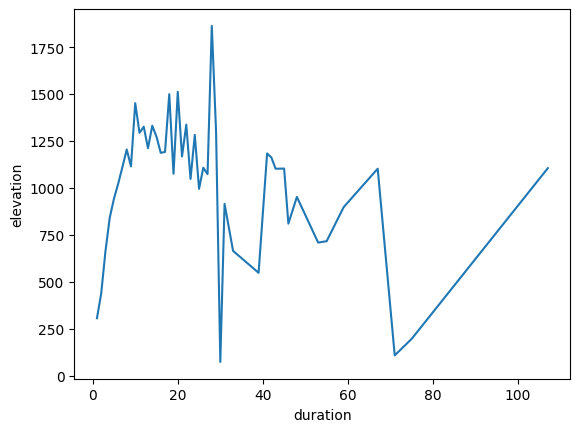

In [ ]:
import seaborn as sns
sns.lineplot(x='duration', y='elevation', data=durationn)

In [ ]:
windspeed = new_df.groupby(['duration'])['wind_speed'].mean().reset_index()

In [ ]:
new_df['wind_direction'] = degree['wind_direction'].str.replace('degree', '')
degree = degree[degree['wind_direction'] != "nan "]
degree['wind_direction'] = pd.to_numeric(degree['wind_direction'])

In [ ]:
degree = new_df.groupby(['duration'])['wind_direction'].mean().reset_index()

<Axes: xlabel='duration', ylabel='wind_speed'>

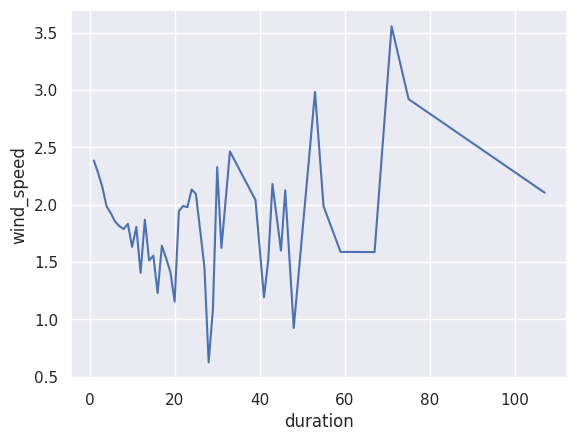

In [ ]:
sns.lineplot(x='duration', y='wind_speed', data=hell)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(x='duration',y='elevation',data=new_df,color='Red')
plt.xlabel('duration')
plt.ylabel('elevation')
plt.show()

# Other aproach extracting


In [ ]:
DEM = ee.Image("USGS/SRTMGL1_003")
def make_points(nodes):
    points = [ee.Geometry.Point(coord) for coord in nodes]

    # make features from points (name by list order)
    feats = [ee.Feature(p, {'data_index': '{}'.format(i)}) for i, p in enumerate(points)]

    # make a featurecollection from points
    fc = ee.FeatureCollection(feats)

    # extract points from DEM
    reducer = ee.Reducer.first()
    data = DEM.reduceRegions(fc, reducer.setOutputs(['elevation']), 30)

    #export as CSV
    task = ee.batch.Export.table.toDrive(data, 'pointsDataExtract', 'Thesis', 'Elevation')
    task.start()
    return

In [ ]:
import time
n = 0
while n <= 1:
  nodess = list_df[n].values.tolist()
  make_points(nodess)
  time.sleep(5)
  n += 1
  if n == 1:
    break